In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('/content/ratings.csv')

In [3]:
df.shape

(7824481, 4)

In [4]:
df.head()

,userid,productid,rating,timestamp
0,A2CX7LUOHB2NDG,0321732944,5.0,1341100800
1,A2NWSAGRHCP8N5,0439886341,1.0,1367193600
2,A2WNBOD3WNDNKT,0439886341,3.0,1374451200
3,A1GI0U4ZRJA8WN,0439886341,1.0,1334707200
4,A1QGNMC6O1VW39,0511189877,5.0,1397433600


In [5]:
df.tail()

,userid,productid,rating,timestamp
7824476,A2YZI3C9MOHC0L,BT008UKTMW,5.0,1396569600
7824477,A322MDK0M89RHN,BT008UKTMW,5.0,1313366400
7824478,A1MH90R0ADMIK0,BT008UKTMW,4.0,1404172800
7824479,A10M2KEFPEQDHN,BT008UKTMW,4.0,1297555200
7824480,A2G81TMIOIDEQQ,BT008V9J9U,5.0,1312675200


In [6]:
df1 = df.copy()
df1.columns = ['user_id', 'product_id', 'rating', 'timestamp']

In [7]:
df1.head()

,user_id,product_id,rating,timestamp
0,A2CX7LUOHB2NDG,0321732944,5.0,1341100800
1,A2NWSAGRHCP8N5,0439886341,1.0,1367193600
2,A2WNBOD3WNDNKT,0439886341,3.0,1374451200
3,A1GI0U4ZRJA8WN,0439886341,1.0,1334707200
4,A1QGNMC6O1VW39,0511189877,5.0,1397433600


In [8]:
df1.tail()

,user_id,product_id,rating,timestamp
7824476,A2YZI3C9MOHC0L,BT008UKTMW,5.0,1396569600
7824477,A322MDK0M89RHN,BT008UKTMW,5.0,1313366400
7824478,A1MH90R0ADMIK0,BT008UKTMW,4.0,1404172800
7824479,A10M2KEFPEQDHN,BT008UKTMW,4.0,1297555200
7824480,A2G81TMIOIDEQQ,BT008V9J9U,5.0,1312675200


In [9]:
df1.shape

(7824481, 4)

In [10]:
df1.isnull().sum()

,0
user_id,0
product_id,0
rating,0
timestamp,0


In [11]:
df1.duplicated().sum()

np.int64(0)

In [12]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7824481 entries, 0 to 7824480
Data columns (total 4 columns):
 #   Column      Dtype  
---  ------      -----  
 0   user_id     object 
 1   product_id  object 
 2   rating      float64
 3   timestamp   int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 238.8+ MB


Shape of the dataset : (7824481,4)

There are no duplicate values nor null values

In [13]:
df1.describe()

,rating,timestamp
count,7.824481e+06,7.824481e+06
mean,4.012337e+00,1.338178e+09
std,1.380910e+00,6.900426e+07
min,1.000000e+00,9.127296e+08
25%,3.000000e+00,1.315354e+09
50%,5.000000e+00,1.361059e+09
75%,5.000000e+00,1.386115e+09
max,5.000000e+00,1.406074e+09


In [14]:
print('Number of unique USERS:',df1['user_id'].nunique())
print('Number of unique PRODUCTS:',df1['product_id'].nunique())

Number of unique USERS: 4201696
Number of unique PRODUCTS: 476001


Number of Users = 42,01,696

Number of Products = 4,76,001

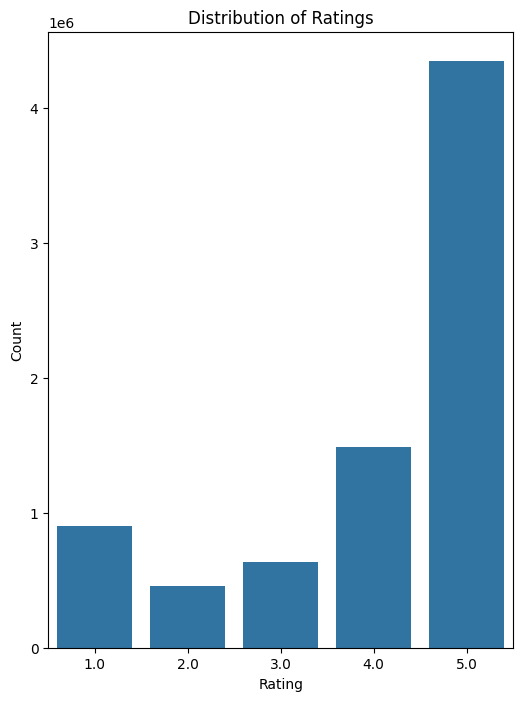

In [15]:
plt.figure(figsize=(6,8))
sns.countplot(x='rating', data=df1)
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

In [16]:
df1.groupby('rating').size().sort_values(ascending=False)

,0
rating,
5.0,4347540
4.0,1485781
1.0,901765
3.0,633073
2.0,456322


5-star reviews take the lead (over 50%), followed by 4-star reviews and with 1-star reviews being more prominent than 3-star and 2-star reviews

In [17]:
most_rated = df1.groupby('user_id').size().sort_values(ascending=False)[:10] ## These are the most active and most rated users
most_rated

,0
user_id,
A5JLAU2ARJ0BO,520
ADLVFFE4VBT8,501
A3OXHLG6DIBRW8,498
A6FIAB28IS79,431
A680RUE1FDO8B,406
A1ODOGXEYECQQ8,380
A36K2N527TXXJN,314
A2AY4YUOX2N1BQ,311
AWPODHOB4GFWL,308


So these are the most active and most rated users. We should recommend these kind of users with more related products, So that there are high chances to buy those new products.

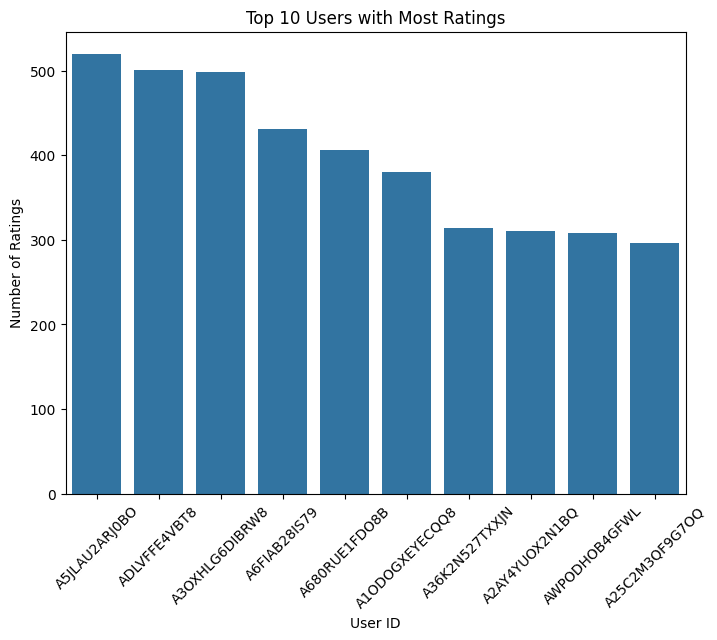

In [18]:
plt.figure(figsize=(8,6))
sns.barplot(x=most_rated.index, y=most_rated.values)
plt.title('Top 10 Users with Most Ratings')
plt.xlabel('User ID')
plt.ylabel('Number of Ratings')
plt.xticks(rotation=45)
plt.show()

In [19]:
most_rated_pro = df1.groupby('product_id').size().sort_values(ascending=False)[:10] ## These are the highest rated products
most_rated_pro

,0
product_id,
B0074BW614,18244
B00DR0PDNE,16454
B007WTAJTO,14172
B0019EHU8G,12285
B006GWO5WK,12226
B003ELYQGG,11617
B003ES5ZUU,10276
B007R5YDYA,9907
B00622AG6S,9823


These are the most used products. So we have to increase these products and introduce related products to increase sales.

In [20]:
num_users = df1['user_id'].nunique()
num_products = df1['product_id'].nunique()
total_possible_interactions = num_users * num_products
actual_interactions = df1.shape[0]
sparsity = 1 - (actual_interactions / total_possible_interactions)
print(f"Sparsity of the User-Product Matrix: {sparsity:.4f} (or {sparsity*100:.2f}%)")

Sparsity of the User-Product Matrix: 1.0000 (or 100.00%)


There is a sparsity of 1.0000 (100%) means that the user-product interaction matrix is extremely sparse. Basically, users rated very few products

- High Sparsity leads to weak model learning, Because models rely on patterns in user behavior.

- So we are using Filtering Sparse Data, to only consider only active users and active products. Reduced dimensionality and improved the quality of matrix.

- It also helps us to reduce computational load and avoid overfitting.

# Filtering Sparse Data

In [21]:
# Step 1: Keep users who rated >= 50 products
user_counts = df1['user_id'].value_counts()
active_users = user_counts[user_counts >= 50].index
df_user_filtered = df1[df1['user_id'].isin(active_users)]
print("After filtering users:", df_user_filtered.shape)

# Step 2: From that, keep products that were rated by >= 10 active users
product_counts = df_user_filtered['product_id'].value_counts()
popular_products = product_counts[product_counts >= 10].index
df_filtered = df_user_filtered[df_user_filtered['product_id'].isin(popular_products)]
print("After filtering products:", df_filtered.shape)

# Step 3: Calculate sparsity again — this time correctly!
num_users = df_filtered['user_id'].nunique()
num_products = df_filtered['product_id'].nunique()
actual = df_filtered.shape[0]
total_possible = num_users * num_products
sparsity = 1 - (actual / total_possible)

print(f"\nUsers: {num_users}, \nProducts: {num_products}, \nActual Ratings: {actual}")
print(f"New Sparsity: {sparsity:.4f} or ({sparsity*100:.2f}%)")

After filtering users: (125871, 4)
After filtering products: (42941, 4)

Users: 1532, 
Products: 2263, 
Actual Ratings: 42941
New Sparsity: 0.9876 or (98.76%)


In [22]:
print('USERS before filtring:',df1['user_id'].nunique())
print('PRODUCTS before filtering:',df1['product_id'].nunique())

USERS before filtring: 4201696
PRODUCTS before filtering: 476001


# User-Product Matrix

- Created a user-product matrix to represent user-product interactions.
- Replaced missing values with 0 to prepare the matrix for modeling.
- The matrix serves as input for recommendation algorithms, enabling personalized recommendations.

In [23]:
# Creating User-Product Matrix
user_product_matrix = df_filtered.pivot_table(
    index='user_id',
    columns='product_id',
    values='rating'
).fillna(0)

print("User-Product Matrix shape:", user_product_matrix.shape)
print(user_product_matrix.head(5))


User-Product Matrix shape: (1532, 2263)
product_id      B00001P4XA  B00001P4ZH  B00001WRSJ  B00001ZWXA  B00004SABB  \
user_id                                                                      
A100UD67AHFODS         0.0         0.0         0.0         0.0         0.0   
A100WO06OQR8BQ         0.0         0.0         0.0         0.0         0.0   
A105S56ODHGJEK         0.0         0.0         0.0         0.0         0.0   
A105TOJ6LTVMBG         0.0         0.0         0.0         0.0         0.0   
A10AFVU66A79Y1         0.0         0.0         0.0         0.0         0.0   

product_id      B00004SB92  B00004T8R2  B00004THCZ  B00004WCIC  B00004WCID  \
user_id                                                                      
A100UD67AHFODS         0.0         0.0         0.0         0.0         0.0   
A100WO06OQR8BQ         0.0         0.0         0.0         0.0         0.0   
A105S56ODHGJEK         0.0         0.0         0.0         0.0         0.0   
A105TOJ6LTVMBG         

In [24]:
user_product_matrix.head(5)

product_id,B00001P4XA,B00001P4ZH,B00001WRSJ,B00001ZWXA,B00004SABB,B00004SB92,B00004T8R2,B00004THCZ,B00004WCIC,B00004WCID,...,B00JXVPHC8,B00JY4QCJQ,B00K91DB7Y,B00KJJW36G,B00KNM763E,B00KVNY2KA,B00L21HC7A,B00L2442H0,B00L26YDA4,B00L3YHF6O
user_id,,,,,,,,,,,,,,,,,,,,,
A100UD67AHFODS,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A100WO06OQR8BQ,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A105S56ODHGJEK,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A105TOJ6LTVMBG,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A10AFVU66A79Y1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


**Model Testing**

In [25]:
# Step 1: Clustering with PCA, KMeans, and DBSCAN
#import required libraries
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns

In [26]:
# Reduce the user-product matrix to 2D for easier visualization
pca = PCA(n_components=2, random_state=42)
pca_result = pca.fit_transform(user_product_matrix)

In [27]:
# Apply KMeans clustering on PCA-reduced data
kmeans = KMeans(n_clusters=3, random_state=42)
labels_km = kmeans.fit_predict(pca_result)
silhouette_km = silhouette_score(pca_result, labels_km)
print(f"KMeans Silhouette Score: {silhouette_km:.3f}")

KMeans Silhouette Score: 0.621


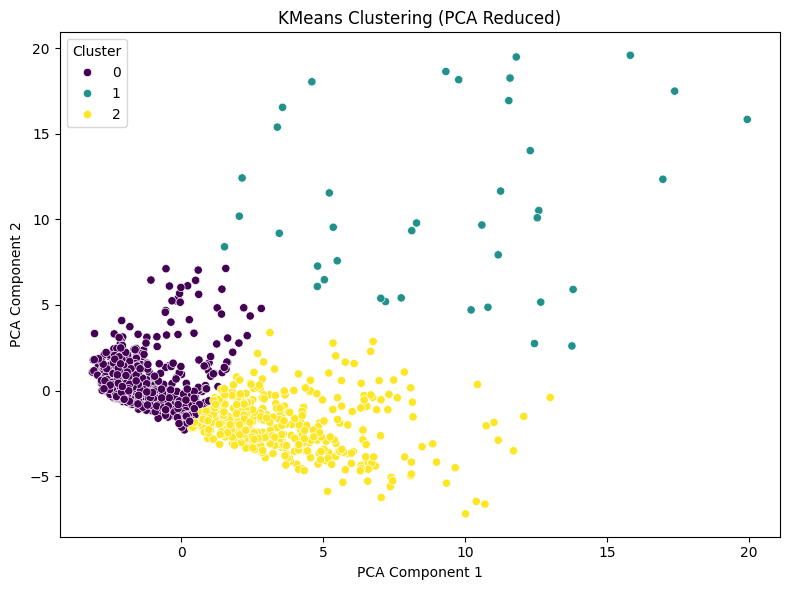

In [28]:
# Visualize KMeans clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(x=pca_result[:, 0], y=pca_result[:, 1], hue=labels_km, palette='viridis')
plt.title("KMeans Clustering (PCA Reduced)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend(title="Cluster")
plt.tight_layout()
plt.show()

In [29]:
# Apply DBSCAN clustering
db = DBSCAN(eps=0.5, min_samples=5)
labels_db = db.fit_predict(pca_result)


DBSCAN Silhouette Score: 0.099


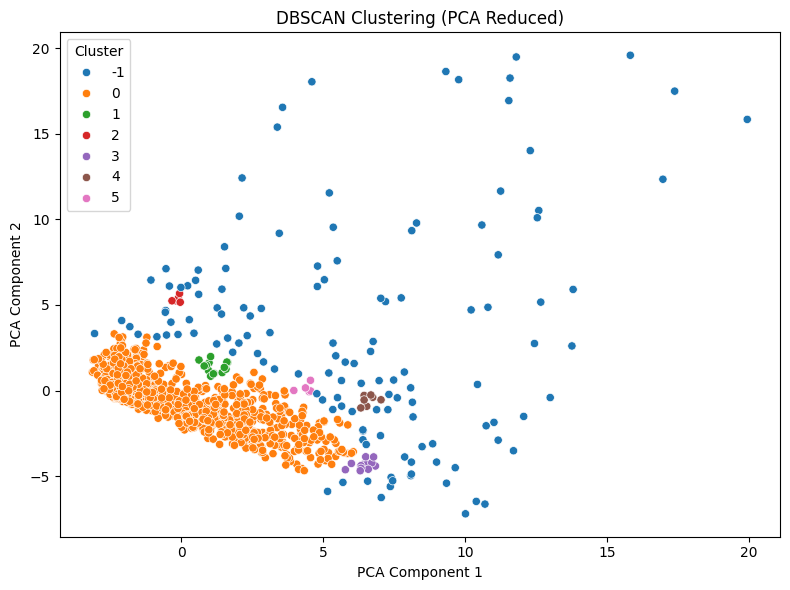

In [30]:

# Check if DBSCAN found valid clusters
if len(set(labels_db)) > 1:
    silhouette_db = silhouette_score(pca_result, labels_db)
    print(f"DBSCAN Silhouette Score: {silhouette_db:.3f}")

    # Visualize DBSCAN results
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=pca_result[:, 0], y=pca_result[:, 1], hue=labels_db, palette='tab10')
    plt.title("DBSCAN Clustering (PCA Reduced)")
    plt.xlabel("PCA Component 1")
    plt.ylabel("PCA Component 2")
    plt.legend(title="Cluster")
    plt.tight_layout()
    plt.show()
else:
    print("DBSCAN found only one cluster or just noise.")


In [31]:
# Step 2: Data Preparation
# convert user_id and product_id into numbers using LabelEncoder to use them in ML models.

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import numpy as np

# Make a safe copy to avoid pandas warnings
df_filtered = df_filtered.copy()


In [32]:
# Encode user and product IDs to numbers
df_filtered['user'] = LabelEncoder().fit_transform(df_filtered['user_id'])
df_filtered['product'] = LabelEncoder().fit_transform(df_filtered['product_id'])

In [33]:
# Define input features (X) and target variable (y)
X = df_filtered[['user', 'product']]
y = df_filtered['rating']

In [34]:
# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [35]:
# === Step 3: Train Multiple Models ===
#Train five different ML models and measure their accuracy using RMSE
#import the required libraries

from lightgbm import LGBMRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Ridge
from sklearn.svm import SVR



In [36]:
# Dictionary of models to test
models = {
    "LightGBM": LGBMRegressor(),
    "XGBoost": XGBRegressor(objective="reg:squarederror"),
    "Random Forest": RandomForestRegressor(n_estimators=100),
    "Ridge Regression": Ridge(),
    "Support Vector Regression": SVR()
}


In [37]:

from sklearn.model_selection import GridSearchCV

# Hyperparameter grids
param_lgb = {
    'n_estimators': [100, 200],
    'learning_rate': [0.05, 0.1],
    'num_leaves': [31, 50],
    'max_depth': [5, 10]
}

param_xgb = {
    'n_estimators': [100, 200],
    'learning_rate': [0.05, 0.1],
    'max_depth': [3, 6]
}

param_rf = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20],
    'min_samples_split': [2, 5]
}

# Initialize models
grid_lgb = GridSearchCV(LGBMRegressor(), param_lgb, cv=3, scoring='neg_root_mean_squared_error', n_jobs=-1, verbose=1)
grid_xgb = GridSearchCV(XGBRegressor(objective="reg:squarederror"), param_xgb, cv=3, scoring='neg_root_mean_squared_error', n_jobs=-1, verbose=1)
grid_rf = GridSearchCV(RandomForestRegressor(), param_rf, cv=3, scoring='neg_root_mean_squared_error', n_jobs=-1, verbose=1)

# Keep other models as-is
ridge = Ridge()
svr = SVR()

In [38]:
# Store RMSE results and trained models
rmse_results = {}
fitted_models = {}


In [39]:
# Train each model and calculate RMSE
print("\nModel RMSE Results")
for name, model in models.items():
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, preds))
    rmse_results[name] = rmse
    fitted_models[name] = model
    print(f"{name} RMSE: {rmse:.3f}")


Model RMSE Results
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001469 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 510
[LightGBM] [Info] Number of data points in the train set: 34352, number of used features: 2
[LightGBM] [Info] Start training from score 4.301700
LightGBM RMSE: 0.960
XGBoost RMSE: 0.968
Random Forest RMSE: 1.000
Ridge Regression RMSE: 0.971
Support Vector Regression RMSE: 1.132


<ipython-input-40-3158855061>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(rmse_results.keys()), y=list(rmse_results.values()), palette="mako")


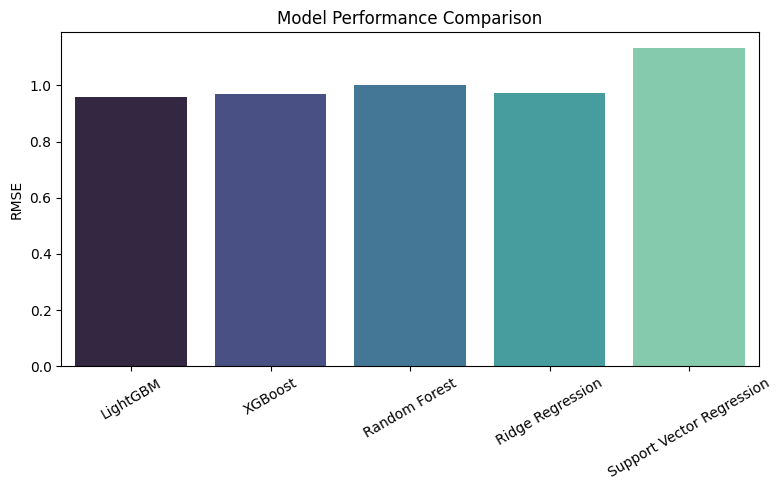

In [40]:
# Step 4: Visualize RMSE for All Models
# Bar plot to compare model performance
plt.figure(figsize=(8, 5))
sns.barplot(x=list(rmse_results.keys()), y=list(rmse_results.values()), palette="mako")
plt.ylabel("RMSE")
plt.title("Model Performance Comparison")
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()


In [41]:
# Step 5: Recommend the Best Model
# Find the model with the lowest RMSE
best_model_name, best_rmse = min(rmse_results.items(), key=lambda x: x[1])
print(f"\nBest model for deployment: {best_model_name} with RMSE = {best_rmse:.3f}")


Best model for deployment: LightGBM with RMSE = 0.960


In [42]:
#Step 6: Save the Best Model
# Save the best model to a file so it can be used later for predictions (deployment)
import joblib
joblib.dump(fitted_models[best_model_name], f"{best_model_name.replace(' ', '_')}_model.pkl")
print(f"Model saved as {best_model_name.replace(' ', '_')}_model.pkl")

Model saved as LightGBM_model.pkl
